In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
import seaborn as sns

In [3]:
df=pd.read_csv("2018_Financial_Data.csv")
df.head()


,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.0000,0.1308,Consumer Cyclical,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.0000,-0.1265,Energy,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.0390,-0.0942,Technology,30.295514,1
3,MU,3.039100e+10,0.4955,1.250000e+10,1.789100e+10,2.141000e+09,8.130000e+08,2.897000e+09,1.499400e+10,3.420000e+08,...,0.4573,0.1511,0.2275,0.6395,-0.5841,0.1738,0.0942,Technology,64.213737,1
4,GE,1.216150e+11,0.0285,9.546100e+10,2.615400e+10,0.000000e+00,1.811100e+10,4.071100e+10,-1.455700e+10,5.059000e+09,...,-0.2781,-0.2892,-0.1575,-0.4487,-0.2297,0.0000,0.0308,Industrials,44.757840,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4392 entries, 0 to 4391
Columns: 225 entries, Unnamed: 0 to Class
dtypes: float64(222), int64(1), object(2)
memory usage: 7.5+ MB


In [5]:
df.describe()

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2019 PRICE VAR [%],Class
count,4.346000e+03,4253.000000,4.207000e+03,4.328000e+03,4.155000e+03,4.226000e+03,4.208000e+03,4.357000e+03,4.208000e+03,4.321000e+03,...,4067.000000,4268.000000,4160.000000,4178.000000,4121.000000,4128.000000,4133.000000,4144.000000,4392.000000,4392.000000
mean,5.119287e+09,3.455278,3.144946e+09,2.043954e+09,1.180176e+08,9.005022e+08,1.435546e+09,6.541207e+08,1.001350e+08,5.584432e+08,...,0.006081,36.768524,0.183066,1.389013,0.262530,9.928446,0.091891,0.153610,20.803948,0.693534
std,2.049504e+10,195.504906,1.508813e+10,7.682369e+09,9.330891e+08,3.661116e+09,5.529831e+09,2.969341e+09,3.780021e+08,2.639327e+09,...,0.239653,2347.079237,4.688013,35.123904,5.612666,363.717734,0.823281,0.839647,82.622147,0.461078
min,-6.894100e+07,-3.461500,-2.669055e+09,-1.818220e+09,-1.042000e+08,-1.401594e+08,-4.280000e+09,-1.455700e+10,-1.408252e+09,-2.177200e+10,...,-1.000000,-1.000000,-1.000000,-0.999100,-32.258100,-1.000000,-1.000000,-1.000000,-99.864779,0.000000
25%,6.501425e+07,0.000000,3.415500e+06,3.618903e+07,0.000000e+00,2.056226e+07,4.223644e+07,-5.510000e+06,0.000000e+00,-1.000800e+07,...,0.000000,-0.048075,0.000000,-0.036700,-0.108600,-0.082850,0.000000,-0.004650,-7.477173,0.000000
50%,4.982640e+08,0.074900,1.741180e+08,2.219470e+08,0.000000e+00,9.390450e+07,1.806253e+08,4.203800e+07,5.693500e+06,2.730700e+07,...,0.000000,0.010200,0.000000,0.034750,0.026100,0.000000,0.000000,0.065700,17.639393,1.000000
75%,2.457878e+09,0.188500,1.297814e+09,9.767015e+08,1.450150e+07,4.117162e+08,6.796040e+08,2.862690e+08,5.817075e+07,2.238810e+08,...,0.042050,0.185900,0.080050,0.160575,0.138400,0.115425,0.009700,0.167625,39.625879,1.000000
max,5.003430e+11,12739.000000,3.733960e+11,1.269470e+11,2.883700e+10,1.065100e+11,1.065100e+11,7.089800e+10,9.168000e+09,7.290300e+10,...,4.079100,153332.333300,293.473000,1184.993800,313.395800,17646.823500,36.898100,43.718800,3756.716345,1.000000


In [6]:
df["Sector"].unique()

array(['Consumer Cyclical', 'Energy', 'Technology', 'Industrials',
       'Financial Services', 'Basic Materials', 'Communication Services',
       'Consumer Defensive', 'Healthcare', 'Real Estate', 'Utilities'],
      dtype=object)

In [7]:
df_copy=df.copy()

Converting categorical column to categorical column

In [8]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df_copy['Sector']= label_encoder.fit_transform(df_copy['Sector'])

df_copy['Sector'].unique()


array([ 2,  4,  9,  7,  5,  0,  1,  3,  6,  8, 10])

In [9]:
df_copy.head(3)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2019 PRICE VAR [%],Class
0,CMCSA,9.450700e+10,0.1115,0.000000e+00,9.450700e+10,0.000000e+00,6.482200e+10,7.549800e+10,1.900900e+10,3.542000e+09,...,0.2570,0.0000,0.3426,0.0722,0.7309,0.000,0.1308,2,32.794573,1
1,KMI,1.414400e+10,0.0320,7.288000e+09,6.856000e+09,0.000000e+00,6.010000e+08,3.062000e+09,3.794000e+09,1.917000e+09,...,0.0345,-0.0920,-0.0024,0.0076,-0.0137,0.000,-0.1265,4,40.588068,1
2,INTC,7.084800e+10,0.1289,2.711100e+10,4.373700e+10,1.354300e+10,6.750000e+09,2.042100e+10,2.331600e+10,-1.260000e+08,...,0.1989,0.0387,0.0382,0.1014,-0.0169,0.039,-0.0942,9,30.295514,1


In [10]:
from sklearn.preprocessing import StandardScaler
# scaled_features2=clean_dataset(df_copy)
scaled_features = StandardScaler().fit_transform(df_copy.iloc[:,1:].values)
# scaled_features2


Feature Extraction

In [11]:
scaled_features

array([[ 4.36193269, -0.0171053 , -0.20846327, ..., -1.27750278,
         0.14514257,  0.66474883],
       [ 0.44038703, -0.01751199,  0.27462297, ..., -0.52689513,
         0.23948025,  0.66474883],
       [ 3.20742317, -0.01701629,  1.58859369, ...,  1.34962401,
         0.11489228,  0.66474883],
       ...,
       [-0.24713223, -0.01654515, -0.20603764, ..., -2.02811044,
        -0.46770447, -1.50432759],
       [-0.24981047, -0.01767569, -0.20846327, ...,  0.59901636,
        -1.14176031, -1.50432759],
       [-0.24722325, -0.01755138, -0.20846327, ...,  0.22371253,
         2.28364624,  0.66474883]])

In [24]:
columns=["Total debt","Operating Income","EBITDA Margin","daysOfPayablesOutstanding","Inventory Turnover","Revenue Growth","Free Cash Flow","returnOnCapitalEmployed","returnOnEquity","Book Value per Share","Class"]
len(columns)

11

We have 10 features and 1 target feature

In [13]:
df_final=df_copy[columns]

In [32]:
df_final.describe()

10865814.75

In [15]:
df_final.isna().sum()

Total debt                    168
Operating Income               35
EBITDA Margin                 308
daysOfPayablesOutstanding     234
Inventory Turnover            239
Revenue Growth                139
Free Cash Flow                167
returnOnCapitalEmployed      1102
returnOnEquity                256
Book Value per Share          252
Class                           0
dtype: int64

In [16]:
for i in df_final.columns:
    df_final[i].fillna(df_final[i].mean(),inplace=True)
    

<ipython-input-16-7cb5fe672eaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final[i].fillna(df_final[i].mean(),inplace=True)


<AxesSubplot:>

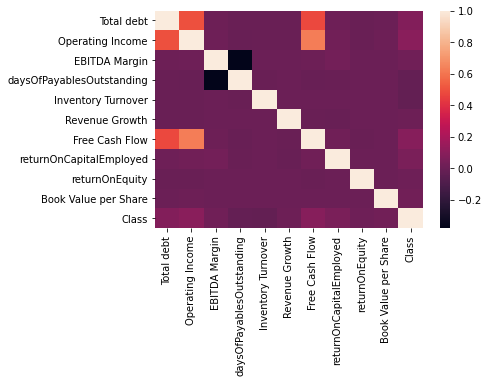

In [28]:
sns.heatmap(df_final.corr())

Removing Feature returnOnEquity and Book Value per Share as the correlation towards target function is as significant as returnoncapital employed

In [29]:
df_final.drop(columns=["returnOnEquity","Book Value per Share"],inplace=True)

<ipython-input-29-026382189327>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop(columns=["returnOnEquity","Book Value per Share"],inplace=True)


Categorizing the data in specific value

* In order to be able to properly use our data , we need to convert some discrete features to categorical features so that we can have fixed number of categories for that column which would be easier for classification .
* So we define a preprocessor function to be applied on different columns .

In [101]:
df_final.describe()

,Total debt,Operating Income,EBITDA Margin,daysOfPayablesOutstanding,Inventory Turnover,Revenue Growth,Free Cash Flow,returnOnCapitalEmployed,Class
count,4.392000e+03,4.392000e+03,4392.000000,4392.000000,4392.000000,4392.000000,4.392000e+03,4392.000000,4392.000000
mean,4.276841e+09,6.541207e+08,-7.943095,264.293788,48.044948,3.455278,5.063973e+08,-0.484180,0.693534
std,2.265331e+10,2.957483e+09,176.037986,3627.701396,1452.817226,192.385604,2.990749e+09,4.886433,0.461078
min,-8.451650e+09,-1.455700e+10,-8809.838000,-26028.289100,0.000000,-3.461500,-6.227011e+10,-151.944400,0.000000
25%,1.086581e+07,-5.199308e+06,-0.024475,11.169625,0.000000,0.000000,-9.571750e+06,-0.484180,0.000000
50%,3.019144e+08,4.366150e+07,0.113000,29.251050,4.218050,0.078800,3.033400e+07,0.000000,1.000000
75%,2.139258e+09,3.019341e+08,0.290000,64.901950,13.153500,0.211475,2.659730e+08,0.067125,1.000000
max,5.336270e+11,7.089800e+10,3090.870000,127441.758100,95827.710300,12739.000000,9.414620e+10,167.328600,1.000000


In [21]:
def Cat_in2(df,atr):
  m = 0
  for i in atr:
    m = df[i].mean()
    df[i] = [1 if x>m else 0 for x in df[i]]
  return df
  
    # print()

In [77]:
def Cat_in3(df,atr):
  for i in atr:
    a=df.describe()[i]["25%"]
    b=df.describe()[i]["75%"]
    for x in range(len(df[i])):
      if df[i][x]<a:
        df[i][x]=0
      if df[i][x]>a:
        if df[i][x]<b:
          df[i][x]=1
      if df[i][x]>b:
        df[i][x]=2
        
    # df[i] = [0 if x<a else 1 if a<=x<b else 2 for x in df[i]]
  return df

In [78]:
df_final_copy=df_final.copy()

In [100]:
df_final_copy.columns

Index(['Total debt', 'Operating Income', 'EBITDA Margin',
       'daysOfPayablesOutstanding', 'Inventory Turnover', 'Revenue Growth',
       'Free Cash Flow', 'returnOnCapitalEmployed', 'Class'],
      dtype='object')

Dividing Features into 2 and 3 discrete value ,
if there numerical  range of  features is more , dividing into 3 discrete values rest 2


In [62]:
col_cat2=["EBITDA Margin","daysOfPayablesOutstanding","Inventory Turnover","Revenue Growth","returnOnCapitalEmployed"]
col_cat3=["Total debt","Operating Income","Free Cash Flow"]

In [79]:
# for i in col_cat2:
    # print(i)
df_final_copy=Cat_in2(df_final_copy,col_cat2)
df_final_copy=Cat_in3(df_final_copy,col_cat3)

<ipython-input-77-327b480694b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][x]=2
<ipython-input-77-327b480694b9>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][x]=1
<ipython-input-77-327b480694b9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i][x]=0
<ipython-input-77-327b480694b9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentat

In [84]:
df_final_copy["Total debt"].unique()

array([2., 1., 0.])

Finding Probabilities of Independence feature

In [90]:
d = {}

def get_prob(atr):
    l = len(df_final_copy)
    uniq = sorted(df_final_copy[atr].unique())
    p = [round(len(df_final_copy[df_final_copy[atr] == x])/l, 4) for x in uniq]
    d[atr] = p
cols = df_final_copy.columns
for i in cols:
  get_prob(i)
print(d)


{'Total debt': [0.25, 0.5, 0.25], 'Operating Income': [0.75, 0.25], 'EBITDA Margin': [0.0383, 0.9617], 'daysOfPayablesOutstanding': [0.9517, 0.0483], 'Inventory Turnover': [0.9192, 0.0808], 'Revenue Growth': [0.9556, 0.0444], 'Free Cash Flow': [0.75, 0.25], 'returnOnCapitalEmployed': [0.0772, 0.9228], 'Class': [0.3065, 0.6935]}


In [94]:
def dep1_prob(atr, dep):
  l = len(df_final_copy)
  u1 = sorted(df_final_copy[atr].unique())
  u2 = sorted(df_final_copy[dep].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      a.append(round(len(df_final_copy[(df_final_copy[atr] == i) & (df_final_copy[dep] == j)])/len(df_final_copy[df_final_copy[dep] == j]), 4))
    p.append(a)
  return p

dep1_prob("Total debt", "Operating Income")

[[0.3212, 0.0364], [0.5744, 0.2769], [0.1044, 0.6867]]

In [95]:
dep1_prob("Operating Income","EBITDA Margin")

[[1.0, 0.7401], [0.0, 0.2599]]

In [97]:
def node2_prob(atr, dep1, dep2):
  u1 = sorted(df_final_copy[atr].unique())
  u2 = sorted(df_final_copy[dep1].unique())
  u3 = sorted(df_final_copy[dep2].unique())
  p = []
  for i in u1:
    a = []
    for j in u2:
      for k in u3:
        a.append(round(len(df_final_copy[(df_final_copy[atr] == i) & (df_final_copy[dep1] == j) & (df_final_copy[dep2] == k)])/len(df_final_copy[(df_final_copy[dep1] == j) & (df_final_copy[dep2] == k)]), 4))
    p.append(a)
  return p

node2_prob('daysOfPayablesOutstanding', 'Inventory Turnover', 'Revenue Growth')

[[0.9504, 0.9255, 0.9799, 1.0], [0.0496, 0.0745, 0.0201, 0.0]]

**Probablistic Graphical Model Relationships**

* In order to create a Probablistic Graphical Model representing this dataset , we first need to find the relationships in the dataset and the flow of influence that is essential in perspective of the PGM.

In [99]:
!pip install networkx
!pip install pgmpy

Traceback (most recent call last):
  File "C:\Users\91889\.conda\Scripts\pip-script.py", line 6, in <module>
    from pip._internal.cli.main import main
  File "C:\Users\91889\.conda\lib\site-packages\pip\_internal\cli\main.py", line 8, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "C:\Users\91889\.conda\lib\site-packages\pip\_internal\cli\autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "C:\Users\91889\.conda\lib\site-packages\pip\_internal\cli\main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "C:\Users\91889\.conda\lib\site-packages\pip\_internal\cli\cmdoptions.py", line 22, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "C:\Users\91889\.conda\lib\site-packages\pip\_internal\cli\progress_bars.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "C:\Users\91889\.conda\lib\site-packa

In [103]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD

InvestmentReturn_model = BayesianNetwork([('daysOfPayablesOutstanding', 'Revenue Growth'), ('Inventory Turnover', 'Revenue Growth'), ('returnOnCapitalEmployed', 'Class'), ('Free Cash Flow', 'Class'), ('Total debt', 'Operating Income'), ('Operating Income', 'EBITDA Margin'), ('EBITDA Margin', 'Class'), ('Revenue Growth', 'Class')])
cpd_td = TabularCPD('Total debt', 3, [[d['Total debt'][0]], [d['Total debt'][1]], [d['Total debt'][2]]])
# cpd_PedFunc = TabularCPD('PedFunc', 2, [[d['DiabetesPedigreeFunction'][0]], [d['DiabetesPedigreeFunction'][1]]])
# cpd_SkinThick = TabularCPD('SkinThick', 3, dep_prob('SkinThickness', 'Total debt'), ['Age'], [3])
# cpd_Pregnancies = TabularCPD('Pregnancies', 3, dep_prob('Pregnancies', 'Age'), ['Age'], [3])
# cpd_BMI = TabularCPD('BMI', 2, dep_prob('BMI', 'SkinThickness'), ['SkinThick'], [3])
# cpd_Glucose = TabularCPD('Glucose', 3, dep_prob('Glucose', 'Insulin'), ['Insulin'], [2])
# cpd_Diabetes = TabularCPD('Diabetes', 2, dep_prob('Outcome', 'Glucose'), ['Glucose'], [3])
# cpd_Insulin = TabularCPD('Insulin', 2, dep_prob2('Insulin', 'Age', 'DiabetesPedigreeFunction'), ['Age', 'PedFunc'], [3, 2])
# cpd_BloodP = TabularCPD('BloodP', 2, dep_prob4('BloodPressure', 'BMI', 'Insulin', 'Glucose', 'Outcome'), ['BMI', 'Insulin', 'Glucose', 'Diabetes'], [2, 2, 3, 2])

ModuleNotFoundError: No module named 'pgmpy'

In [20]:
# # logistic regression for feature importance
# from sklearn.datasets import make_classification
# from sklearn.linear_model import LogisticRegression
# from matplotlib import pyplot
# # define dataset
# X=scaled_features
# y=df["Class"]
# # define the model
# model = LogisticRegression()
# X = X.values.astype(np.float)
# y = y.values.astype(np.float)
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.coef_[0]
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# pyplot.bar([x for x in range(len(importance))], importance)
# pyplot.show()